**Simple Linear Regression**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

**Step-1 - Read the Dataset**

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


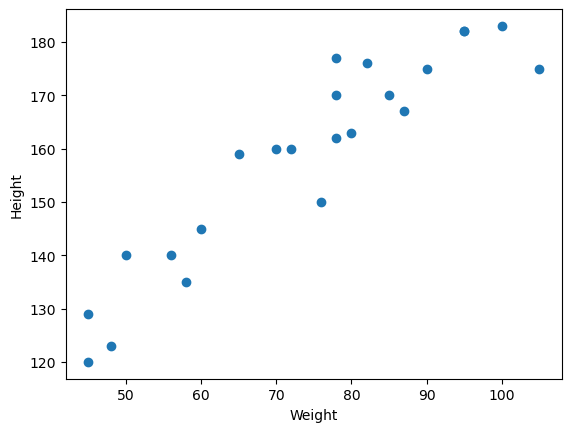

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

**Step-2 Divide out Dataset into independent and dependent features**

In [7]:
x=df[['Weight']]#independent features
y=df['Height']#dependent features

In [9]:
x.shape,y.shape

((23, 1), (23,))

**Step-3 Further divide the dataset into train and test**

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)## x for independent features and y for dependant features test size 20percent of the x is going for testng 

In [13]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [14]:
Y_train.shape,Y_test.shape

((18,), (5,))

**Step-4 Standard Scaling On the train and test dataset**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)##in the train dataset always fit_transform is used 


In [19]:
X_test=scaler.transform(X_test)#in the test dataset always transform is used 

In [20]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

Text(0, 0.5, 'y_train')

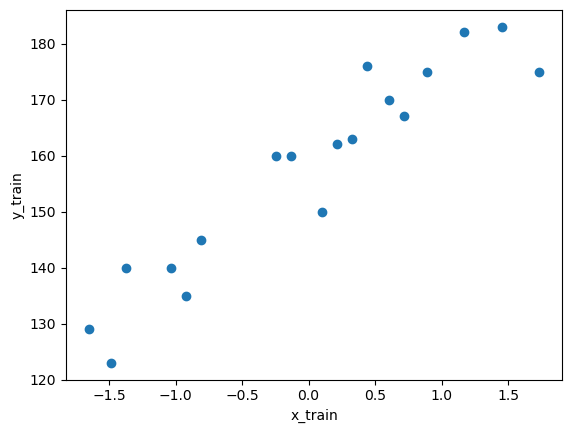

In [24]:
plt.scatter(X_train,Y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')

In [25]:
scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

**Step-5 Model Training**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor=LinearRegression()

In [31]:
#Traning the train data 
regressor.fit(X_train,Y_train)

LinearRegression()

In [32]:
regressor.intercept_

157.5

In [33]:
regressor.coef_

array([17.03440872])

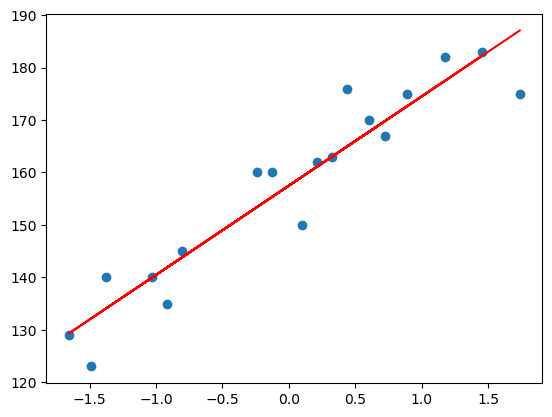

In [36]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

**Prediction of train data**

1.predicted height output=intercept+coef_(Weight)


2.y_pred_train=157.5+17.03(X_train)


**Prediction of test data**

1.predicted height output =intercept+coef_(Weight)

2.y_pred_test=157.5+17.03(X_test)

In [37]:
##Prediction for test data
y_pred_test=regressor.predict(X_test)

In [38]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [39]:
Y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

**Performance Metrics MAE,MSE,RMSE**

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [42]:
mse=mean_squared_error(Y_test,y_pred_test)
mae=mean_absolute_error(Y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


**Accuracy of the model R squared and Adjusted R squared**

**R squared formula**

R_squared = 1-SSR/SST

R_squared=Accuracy of the model

SSR=sum of square of residuals 

SST=sum of square of totals 

In [44]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score(Y_test,y_pred_test)
score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [46]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252